# Flight Price Prediction : Feature Engineering

In this notebook, we focus on preparing flight ticket data for price prediction. 

Key steps include handling date-time data, extracting new features, and cleaning the data.

The dataset contains date and time columns, which can be complex to handle. We will parse and extract meaningful features from them (e.g., journey day, month, departure hour).

In [141]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
# Loading of dataset - Train
train_df =pd.read_excel('Data_Train.xlsx')

In [30]:
# Loading of dataset - Test
test_df =pd.read_excel('Test_set.xlsx')

In [27]:
# Display first few rows of training data
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [32]:
# Shape of Datasets
print(train_df.shape)
print(test_df.shape)

(10683, 11)
(2671, 10)


In [ ]:
# describe about the data
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# Basic info on train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Data Cleaning

Now that we've loaded the datasets, we begin preprocessing by handling missing values, correcting data types, and removing inconsistencies.

In [34]:
# Check for missing values
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observed that there are 2 missing values, drop these as they are very less

In [40]:
#drop the nullvalues
train_df.dropna(inplace=True)

In [41]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [43]:
train_df.dtypes # datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.

So, we convert it into date and time for proper predicion.

dt.day method will extract only day of that date
dt.month method will extract only month of that date

In [46]:
def change_into_datetime(col):
    train_df[col]=pd.to_datetime(train_df[col])

In [47]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [51]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [52]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Finding the categorical value

In [78]:
column=[column for column in train_df.columns if train_df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Finding the numerical value

In [80]:
numerical_col =[column for column in train_df.columns if train_df[column].dtype!='object']
numerical_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

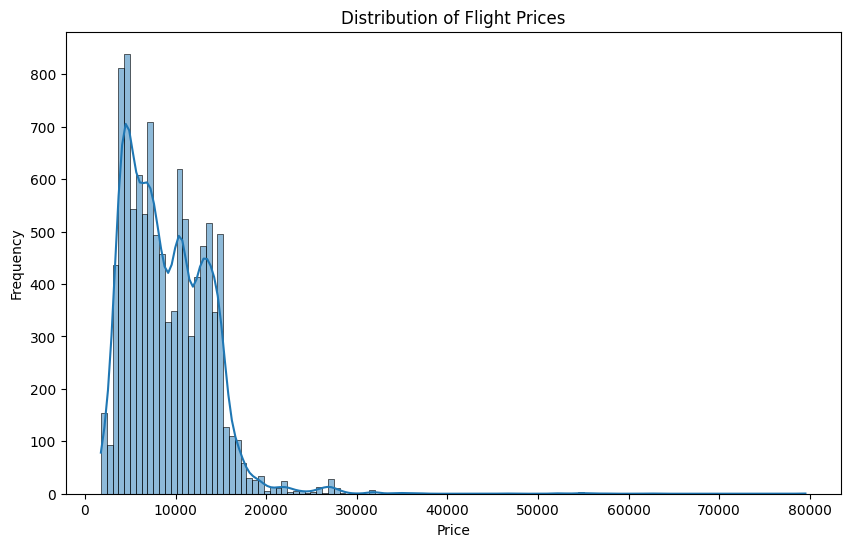

In [81]:
# Distribution of flight prices
plt.figure(figsize=(10,6))
sns.histplot(train_df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Observation:

Majority of flights are priced between ₹2,000 and ₹15,000.

A few flights are extremely expensive (₹30,000–₹80,000), likely outliers or premium services.

The distribution is right-skewed, meaning most flight prices are concentrated at the lower end.


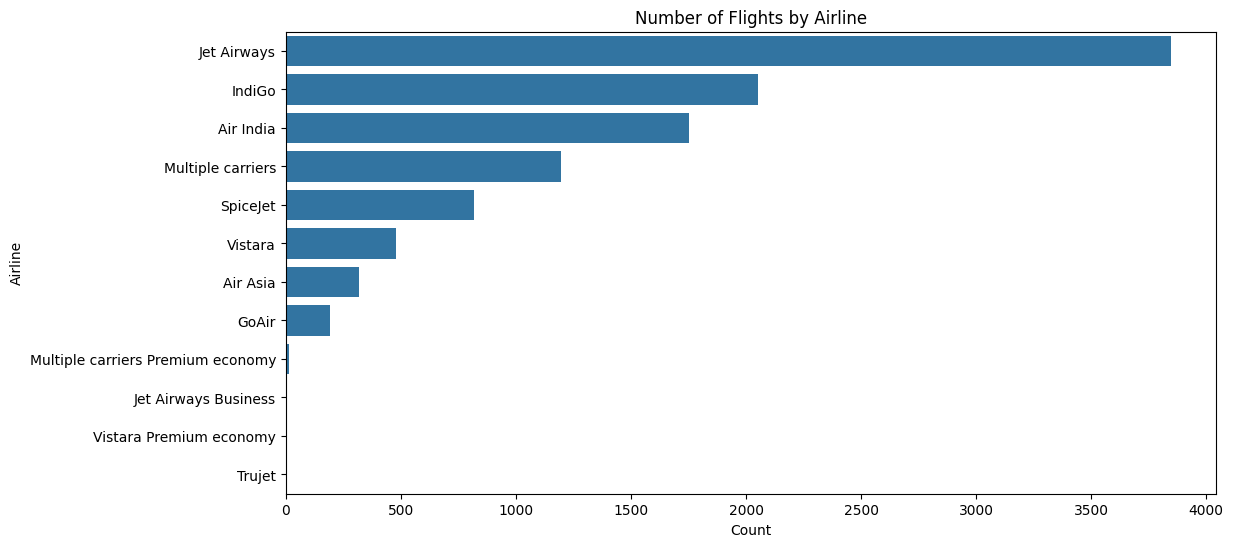

In [82]:
# Count plot of airlines
plt.figure(figsize=(12,6))
sns.countplot(y='Airline', data=train_df, order=train_df['Airline'].value_counts().index)
plt.title('Number of Flights by Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

Observation:

Jet Airways operates the highest number of flights in the dataset, followed by IndiGo and Air India.

Airlines like TruJet, Jet Airways Business, and Vistara Premium Economy have very few records, possibly indicating rare or premium flight types.

The distribution is imbalanced, meaning that a few airlines dominate the dataset, while others contribute very little.

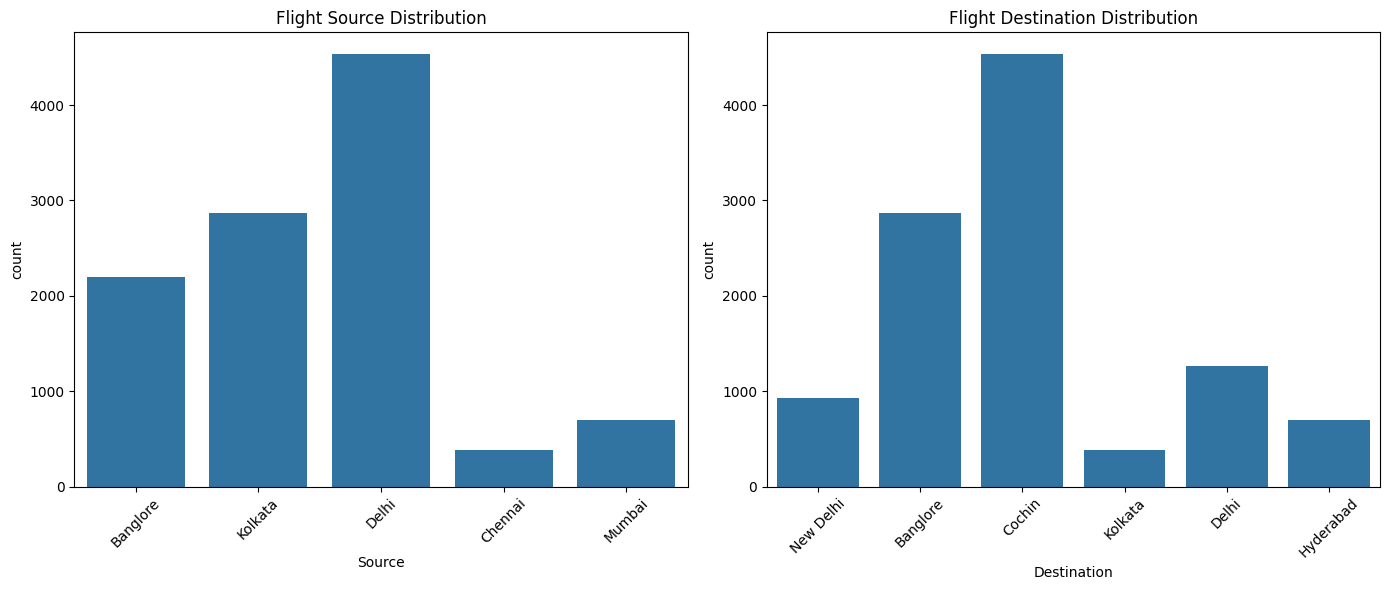

In [83]:
# Count plot for Source and Destination
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=train_df, x='Source', ax=ax[0])
ax[0].set_title("Flight Source Distribution")
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(data=train_df, x='Destination', ax=ax[1])
ax[1].set_title("Flight Destination Distribution")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Observation:

Source Distribution (Left Plot):
Delhi is the most common departure city, followed by Kolkata and Bangalore.

Chennai and Mumbai have significantly fewer flights departing compared to other cities.

Destination Distribution (Right Plot):
Cochin is the most frequent arrival city, followed by Bangalore and Delhi.

Fewer flights arrive in Kolkata and Hyderabad



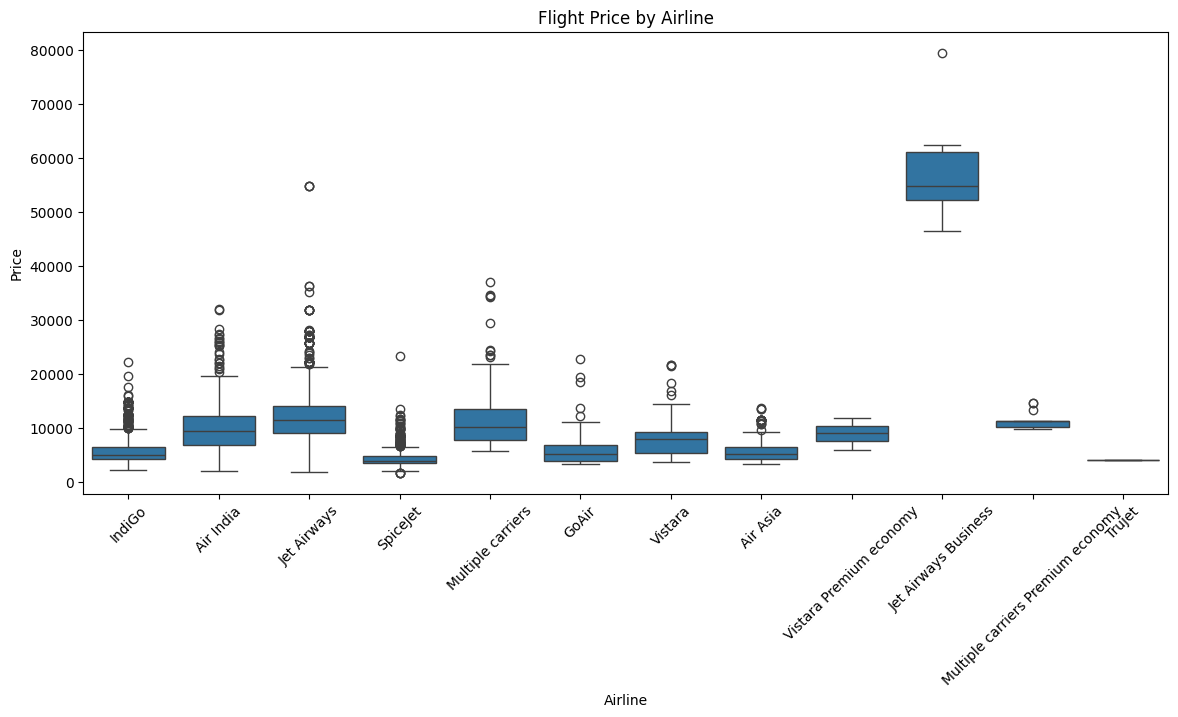

In [84]:
# Boxplot to see variation of price with different Airlines
plt.figure(figsize=(14,6))
sns.boxplot(data=train_df, x='Airline', y='Price')
plt.xticks(rotation=45)
plt.title('Flight Price by Airline')
plt.show()

Observation:

Airlines like Jet Airways Business and Vistara Premium Economy have significantly higher median prices, reflecting premium services.

IndiGo, GoAir, and Air Asia show lower median prices, indicating budget airlines.

There are many outliers in most airlines, especially Jet Airways and Air India, suggesting price variability based on routes or service class.

In [ ]:
# Combine train_df and test_df into a single DataFrame
final_df = pd.concat([train_df, test_df], ignore_index=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [86]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [87]:
final_df.shape

(13354, 11)

In [14]:
final_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [18]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


## Feature Engineering

### Numerical Values

In [ ]:
# Feature - Date_of_Journey
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [95]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [97]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [98]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [99]:
final_df.drop('Date_of_Journey', axis=1, inplace=True)

In [100]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [ ]:
# Feature - Arrival Time
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [105]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [106]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [108]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [109]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.5+ MB


In [110]:
final_df.drop('Arrival_Time', axis=1, inplace=True)

In [111]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [ ]:
# Feature - Departure Time
final_df['Dep_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df.drop('Dep_Time', axis=1, inplace=True)

In [113]:
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_min']=final_df['Dep_min'].astype(int)

In [114]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dep_hour         13354 non-null  int64  
 14  Dep_min          13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.5+ MB


In [ ]:
# Feature - Total Stops
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [117]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [ ]:
final_df.drop('Route',axis=1, inplace=True) # Route is dropped as it is not required.

In [120]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
# Feature - Duration
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [128]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


Drop the rows - Duration 5m is not correct

In [131]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(13343,axis=0,inplace=True)

In [132]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23
13350,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2
13351,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6
13352,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15


In [ ]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

In [135]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Duration         13352 non-null  object 
 4   Total_Stops      13351 non-null  float64
 5   Additional_Info  13352 non-null  object 
 6   Price            10682 non-null  float64
 7   Date             13352 non-null  int64  
 8   Month            13352 non-null  int64  
 9   Year             13352 non-null  int64  
 10  Arrival_hour     13352 non-null  int64  
 11  Arrival_min      13352 non-null  int64  
 12  Dep_hour         13352 non-null  int64  
 13  Dep_min          13352 non-null  int64  
 14  duration_hour    13352 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 1.6+ MB


In [136]:
final_df.drop('Duration', axis=1, inplace=True)

In [137]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


### Categorical Values

In [144]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])

0

In [ ]:
# Import LabelEncoder to convert categorical string values into numeric labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
# Convert categorical columns into numeric form so that they can be used in ML models
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [154]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4
